In [147]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [148]:
dataset = pd.read_csv("../dataset/data.csv")
dataset

,Body Size,Body Weight,Height,Bone Structure,Com1lexion,General feel of skin,Texture of Skin,Hair Color,A11earance of Hair,Sha1e of face,...,Eyelashes,Blinking of Eyes,Cheeks,Nose,Teeth and gums,Li1s,Nails,A11etite,Liking tastes,Dosha
0,1,1,1,2,2,0,0,0,1,0,...,1,1,0,2,2,0,2,2,0,3
1,1,1,0,1,1,0,2,1,0,0,...,1,1,1,2,1,0,0,2,0,3
2,0,1,1,1,1,1,2,0,0,0,...,1,1,1,2,1,1,1,2,0,1
3,0,1,0,0,1,0,2,0,1,2,...,0,1,1,0,1,1,0,2,0,3
4,2,1,0,1,0,1,2,0,0,0,...,0,1,0,1,1,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,1,0,1,1,1,2,0,0,0,...,1,1,0,2,1,1,0,2,0,3
1196,1,1,2,1,1,1,2,0,0,0,...,1,1,1,0,1,1,0,1,0,3
1197,0,0,1,0,1,1,2,0,2,1,...,1,0,0,0,0,1,1,0,0,3
1198,2,2,1,2,1,1,2,0,1,2,...,1,1,2,2,1,1,0,2,0,4


In [149]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,20].values
print(X)

[[1 1 1 ... 2 2 0]
 [1 1 0 ... 0 2 0]
 [0 1 1 ... 1 2 0]
 ...
 [0 0 1 ... 1 0 0]
 [2 2 1 ... 0 2 0]
 [2 1 2 ... 0 0 0]]


In [150]:
print(Y)

[3 3 1 ... 3 4 3]


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [152]:
X_train

array([[1, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 2, 0],
       [0, 0, 1, ..., 1, 2, 2]], dtype=int64)

In [153]:
dataset

,Body Size,Body Weight,Height,Bone Structure,Com1lexion,General feel of skin,Texture of Skin,Hair Color,A11earance of Hair,Sha1e of face,...,Eyelashes,Blinking of Eyes,Cheeks,Nose,Teeth and gums,Li1s,Nails,A11etite,Liking tastes,Dosha
0,1,1,1,2,2,0,0,0,1,0,...,1,1,0,2,2,0,2,2,0,3
1,1,1,0,1,1,0,2,1,0,0,...,1,1,1,2,1,0,0,2,0,3
2,0,1,1,1,1,1,2,0,0,0,...,1,1,1,2,1,1,1,2,0,1
3,0,1,0,0,1,0,2,0,1,2,...,0,1,1,0,1,1,0,2,0,3
4,2,1,0,1,0,1,2,0,0,0,...,0,1,0,1,1,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,1,0,1,1,1,2,0,0,0,...,1,1,0,2,1,1,0,2,0,3
1196,1,1,2,1,1,1,2,0,0,0,...,1,1,1,0,1,1,0,1,0,3
1197,0,0,1,0,1,1,2,0,2,1,...,1,0,0,0,0,1,1,0,0,3
1198,2,2,1,2,1,1,2,0,1,2,...,1,1,2,2,1,1,0,2,0,4


In [154]:
X

array([[1, 1, 1, ..., 2, 2, 0],
       [1, 1, 0, ..., 0, 2, 0],
       [0, 1, 1, ..., 1, 2, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [2, 2, 1, ..., 0, 2, 0],
       [2, 1, 2, ..., 0, 0, 0]], dtype=int64)

In [155]:
Y

array([3, 3, 1, ..., 3, 4, 3], dtype=int64)

In [156]:
model = keras.Sequential([
    keras.layers.Dense(19,input_shape=(20,),activation='relu'),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(45,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(6,activation='sigmoid')    
])


In [157]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [158]:
model.fit(X_train,y_train,epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20


12/12 [==============================] - 2s 20ms/step - loss: 1.7051 - accuracy: 0.1953 - val_loss: 1.5613 - val_accuracy: 0.2344
Epoch 2/20
12/12 [==============================] - 0s 6ms/step - loss: 1.5101 - accuracy: 0.4323 - val_loss: 1.4058 - val_accuracy: 0.5052
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 1.3203 - accuracy: 0.5234 - val_loss: 1.2489 - val_accuracy: 0.5052
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 1.1628 - accuracy: 0.5234 - val_loss: 1.0907 - val_accuracy: 0.5052
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 1.0220 - accuracy: 0.5482 - val_loss: 0.9852 - val_accuracy: 0.5417
Epoch 6/20
12/12 [==============================] - 0s 6ms/step - loss: 0.8993 - accuracy: 0.5964 - val_loss: 0.7804 - val_accuracy: 0.6250
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 0.7433 - accuracy: 0.6458 - val_loss: 0.6124 - val_accuracy: 0.7135
Epoch 8/20
12/12 [============

In [159]:
X_train[0]

array([1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [160]:
X_test

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 2, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 2, 2, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [161]:
model.predict(X_test)

8/8 [==============================] - 0s 1ms/step


array([[2.4260900e-05, 9.9999988e-01, 8.7497008e-01, 9.9354041e-01,
        4.5868760e-11, 1.7451738e-04],
       [9.9999386e-01, 9.4850361e-01, 1.1398264e-04, 1.0000000e+00,
        6.8656482e-12, 2.2611630e-06],
       [9.9865848e-01, 9.4201100e-01, 3.8878974e-03, 9.9999970e-01,
        5.5184508e-08, 3.4394109e-04],
       ...,
       [1.0000000e+00, 8.1282824e-06, 9.3870716e-07, 9.9999905e-01,
        6.6458315e-02, 4.7145313e-06],
       [1.4949328e-05, 1.0000000e+00, 7.9176909e-01, 9.9904388e-01,
        8.2304178e-13, 2.9723782e-05],
       [1.0000000e+00, 2.9195109e-09, 1.1637736e-09, 1.0000000e+00,
        2.0649195e-01, 1.8079945e-08]], dtype=float32)

In [162]:
np.argmax(model.predict([[2,1,2,2,1,0,2,0,1,0,1,1,1,1,2,1,1,0,0,0]]))

1/1 [==============================] - 0s 108ms/step


3

In [163]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score

In [164]:
Y_pred=model.predict(X_test)

8/8 [==============================] - 0s 3ms/step


In [165]:
Y_pred

array([[2.4260900e-05, 9.9999988e-01, 8.7497008e-01, 9.9354041e-01,
        4.5868760e-11, 1.7451738e-04],
       [9.9999386e-01, 9.4850361e-01, 1.1398264e-04, 1.0000000e+00,
        6.8656482e-12, 2.2611630e-06],
       [9.9865848e-01, 9.4201100e-01, 3.8878974e-03, 9.9999970e-01,
        5.5184508e-08, 3.4394109e-04],
       ...,
       [1.0000000e+00, 8.1282824e-06, 9.3870716e-07, 9.9999905e-01,
        6.6458315e-02, 4.7145313e-06],
       [1.4949328e-05, 1.0000000e+00, 7.9176909e-01, 9.9904388e-01,
        8.2304178e-13, 2.9723782e-05],
       [1.0000000e+00, 2.9195109e-09, 1.1637736e-09, 1.0000000e+00,
        2.0649195e-01, 1.8079945e-08]], dtype=float32)

In [176]:
target=["Vata","Pitta","Kapha","vata+pitta","vata+kapha","pitta+kapha"]

In [166]:
y_predict_labels = [np.argmax(i) for i in Y_pred]
y_predict_labels

[1,
 3,
 3,
 3,
 5,
 1,
 0,
 0,
 2,
 3,
 1,
 4,
 1,
 1,
 0,
 3,
 0,
 3,
 0,
 0,
 3,
 0,
 0,
 4,
 0,
 3,
 3,
 3,
 5,
 4,
 3,
 1,
 1,
 4,
 3,
 3,
 4,
 3,
 3,
 0,
 3,
 3,
 1,
 3,
 2,
 0,
 3,
 0,
 3,
 3,
 3,
 0,
 3,
 5,
 0,
 5,
 3,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 1,
 0,
 0,
 1,
 3,
 4,
 0,
 0,
 3,
 1,
 3,
 2,
 0,
 0,
 2,
 5,
 3,
 4,
 3,
 1,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 1,
 3,
 0,
 3,
 3,
 0,
 0,
 3,
 3,
 4,
 5,
 0,
 1,
 3,
 3,
 3,
 0,
 3,
 3,
 4,
 3,
 1,
 3,
 0,
 0,
 1,
 3,
 0,
 3,
 3,
 1,
 3,
 4,
 0,
 3,
 1,
 0,
 3,
 5,
 2,
 3,
 0,
 3,
 1,
 2,
 3,
 0,
 3,
 3,
 3,
 0,
 1,
 1,
 3,
 4,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 4,
 3,
 0,
 1,
 0,
 3,
 3,
 5,
 3,
 1,
 3,
 3,
 0,
 0,
 3,
 0,
 1,
 3,
 1,
 3,
 0,
 3,
 4,
 1,
 1,
 3,
 0,
 1,
 3,
 0,
 0,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 0,
 4,
 3,
 3,
 0,
 0,
 0,
 5,
 0,
 3,
 3,
 2,
 1,
 0,
 3,
 0,
 0,
 1,
 3,
 0,
 2,
 4,
 0,
 0,
 3,
 0,
 1,
 0]

In [177]:
outputs=[target[i] for i in y_predict_labels]
outputs

['Pitta',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'pitta+kapha',
 'Pitta',
 'Vata',
 'Vata',
 'Kapha',
 'vata+pitta',
 'Pitta',
 'vata+kapha',
 'Pitta',
 'Pitta',
 'Vata',
 'vata+pitta',
 'Vata',
 'vata+pitta',
 'Vata',
 'Vata',
 'vata+pitta',
 'Vata',
 'Vata',
 'vata+kapha',
 'Vata',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'pitta+kapha',
 'vata+kapha',
 'vata+pitta',
 'Pitta',
 'Pitta',
 'vata+kapha',
 'vata+pitta',
 'vata+pitta',
 'vata+kapha',
 'vata+pitta',
 'vata+pitta',
 'Vata',
 'vata+pitta',
 'vata+pitta',
 'Pitta',
 'vata+pitta',
 'Kapha',
 'Vata',
 'vata+pitta',
 'Vata',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'Vata',
 'vata+pitta',
 'pitta+kapha',
 'Vata',
 'pitta+kapha',
 'vata+pitta',
 'Vata',
 'vata+pitta',
 'vata+pitta',
 'Vata',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'vata+pitta',
 'Pitta',
 'Vata',
 'Vata',
 'Pitta',
 'vata+pitta',
 'vata+kapha',
 'Vata',
 'Vata',
 'vata+pitta',
 'Pitta',
 'vata+pitta',
 'Kapha',
 'Vata',
 'Vata',
 'Kapha',
 'p

In [167]:
print(classification_report(y_test,y_predict_labels))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        48
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00         9
           3       1.00      0.84      0.91       125
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        10

    accuracy                           0.92       240
   macro avg       0.95      0.97      0.96       240
weighted avg       0.94      0.92      0.92       240



In [168]:
print(confusion_matrix(y_test,y_predict_labels))

[[ 48   0   0   0   0   0]
 [  0  33   0   0   0   0]
 [  0   0   9   0   0   0]
 [ 20   0   0 105   0   0]
 [  0   0   0   0  15   0]
 [  0   0   0   0   0  10]]


In [169]:
print(accuracy_score(y_test,y_predict_labels)*100)

91.66666666666666


In [170]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)

In [171]:
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[ 48,   0,   0,   0,   0,   0],
       [  0,  33,   0,   0,   0,   0],
       [  0,   0,   9,   0,   0,   0],
       [ 20,   0,   0, 105,   0,   0],
       [  0,   0,   0,   0,  15,   0],
       [  0,   0,   0,   0,   0,  10]])>

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt


[]

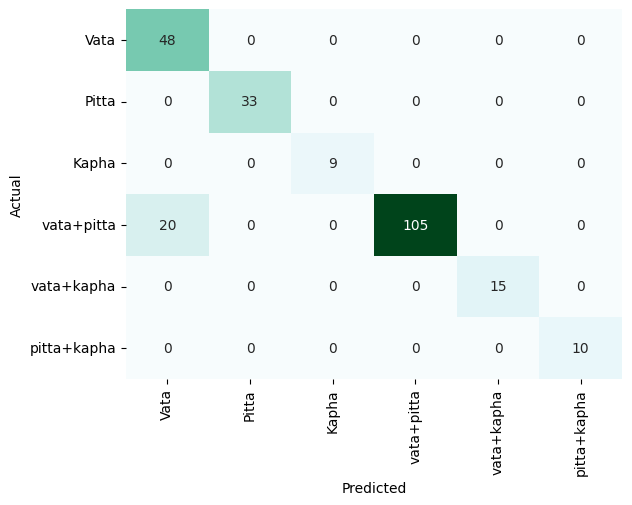

In [191]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=target,yticklabels=target,cbar=False,cmap="BuGn")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.plot()

In [188]:
print(recall_score(y_test,y_predict_labels,average="weighted"))

0.9166666666666666


In [189]:
print(precision_score(y_test,y_predict_labels,average="weighted"))

0.9411764705882353


In [190]:
from sklearn.metrics import f1_score


print(f1_score(y_test,y_predict_labels,average="weighted"))

0.9202273863068465
